## Data account understanding after data preparation from crisp-dm sprints 1 and 2

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy
import numpy as np
import data_understanding_utils as du
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
# not cut columns
pd.set_option('display.max_columns',None)

path= "./refined/"
account_data = pd.read_csv(path+"account.csv", sep=';')

account_data

,account_id,district_id,account_frequency,account_date,account_year
0,576,55,1,1993-01-01,1993
1,3818,74,1,1993-01-01,1993
2,704,55,1,1993-01-01,1993
3,2378,16,1,1993-01-01,1993
4,2632,24,1,1993-01-02,1993
...,...,...,...,...,...
4495,124,55,1,1997-12-28,1997
4496,3958,59,1,1997-12-28,1997
4497,777,30,1,1997-12-28,1997
4498,1573,63,1,1997-12-29,1997


### 2.2 Describe data



In [9]:
du.info_data(account_data,"shape","")
du.info_data(account_data,"head","")

(4500, 5)

   account_id  district_id  account_frequency account_date  account_year
0         576           55                  1   1993-01-01          1993
1        3818           74                  1   1993-01-01          1993
2         704           55                  1   1993-01-01          1993
3        2378           16                  1   1993-01-01          1993
4        2632           24                  1   1993-01-02          1993



#### Info about the dataset

In [10]:
du.info_data(account_data,"info","")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   account_id         4500 non-null   int64 
 1   district_id        4500 non-null   int64 
 2   account_frequency  4500 non-null   int64 
 3   account_date       4500 non-null   object
 4   account_year       4500 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 175.9+ KB
None



In [11]:
du.info_data(account_data,"isnull","")

Number of null values: 
 account_id           0
district_id          0
account_frequency    0
account_date         0
account_year         0
dtype: int64



In [12]:
res_duplicate = du.check_duplicates(account_data,"Disp",["account_id"])

No duplicates found in the data


No null values in the dataset or duplicate rows with the same account_id.

In the data preparation step, we need to create new features from the existing ones. For example to have the account age, maybe change how frequency atribute is represented and other usefull informations.

#### Statistical Summary

In [13]:
du.info_data(account_data,"describe","")



         account_id  district_id  account_frequency  account_year
count   4500.000000  4500.000000        4500.000000   4500.000000
mean    2786.067556    37.310444           1.032667   1995.098222
std     2313.811984    25.177217           0.270091      1.483898
min        1.000000     1.000000           0.000000   1993.000000
25%     1182.750000    13.000000           1.000000   1993.000000
50%     2368.000000    38.000000           1.000000   1996.000000
75%     3552.250000    60.000000           1.000000   1996.000000
max    11382.000000    77.000000           2.000000   1997.000000



### Data Summarization

We will merge the data from account.csv with loan_dev.csv so we can have a better understanding of the data as a whole and for our business goals.

In [14]:
loans = pd.read_csv (path+"loan.csv", sep=';')
account_loans = pd.merge(loans, account_data ,on='account_id')
account_loans

,Unnamed: 0,loan_id,account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status,loan_year,district_id,account_frequency,account_date,account_year
0,0,5314,1787,1993-07-05,96396,12,8033,0,1993,30,2,1993-03-22,1993
1,1,5316,1801,1993-07-11,165960,36,4610,1,1993,46,1,1993-02-13,1993
2,2,6863,9188,1993-07-28,127080,60,2118,1,1993,45,1,1993-02-08,1993
3,3,5325,1843,1993-08-03,105804,36,2939,1,1993,12,1,1993-01-30,1993
4,4,7240,11013,1993-09-06,274740,60,4579,1,1993,1,2,1993-02-14,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,323,6818,9030,1996-12-12,155616,48,3242,1,1996,72,1,1995-01-21,1995
324,324,5625,3189,1996-12-15,222180,60,3703,0,1996,29,1,1995-11-29,1995
325,325,6805,8972,1996-12-21,45024,48,938,1,1996,70,1,1996-05-21,1996
326,326,7233,10963,1996-12-25,115812,36,3217,1,1996,16,1,1995-05-20,1995


In the data preparation we also need to change the names of the columns to make it easier to understand, for example, we can change the column name "frequency" to "frequency_of_payments" and "date_x" to "date_loan", or even create new variables to get a more understandable date loan or date account.

/home/wolfcuanhamarws/Desktop/Faculdade/2023/AC/Project/AC-Project/Notebooks/crisp_dm_sprint_3_4/data_understanding_utils.py:60: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cbar=True, cmap='coolwarm')


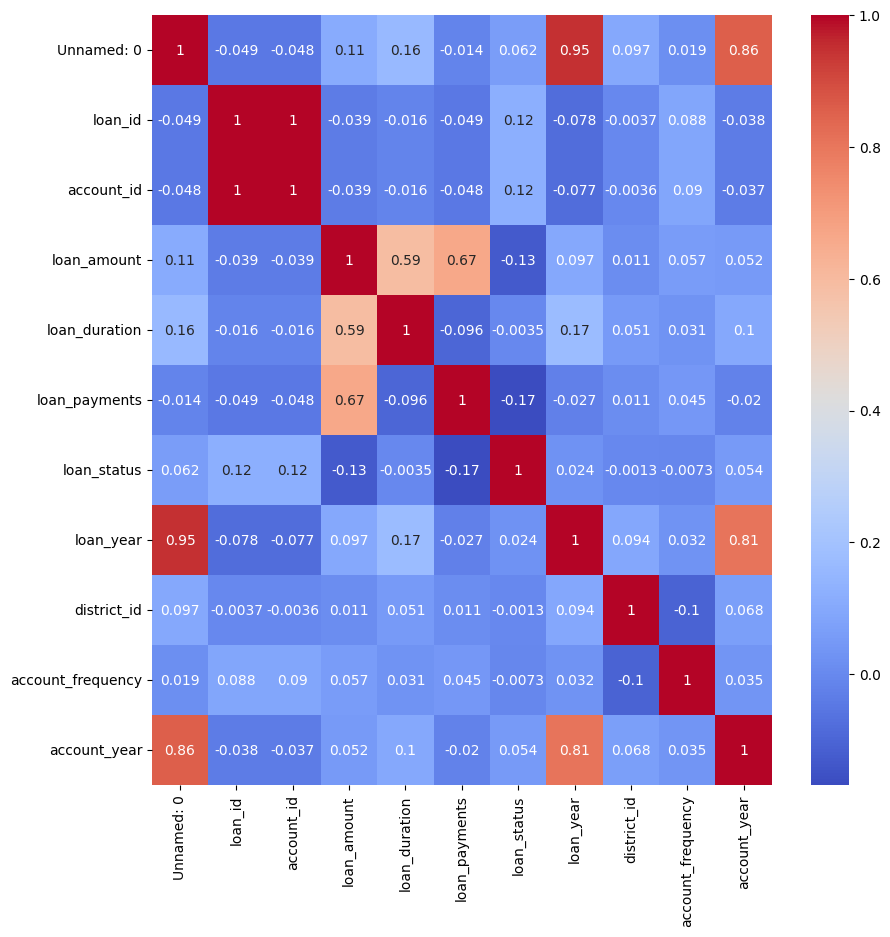

In [15]:
du.data_summarization(account_loans,"correlation")

After change variables , names etc: check correlation between variables date_x and date_y, and others we thing are important.

Compare the variables wit plots and other information